In [2]:
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

# calc & draw

def interpolate(x, y, i):
  return x * (1.0 - i) + y * i

def clamp(x, min, max):
  if (x < min):
    return min
  if (x > max):
    return max
  return x

def max(a, b):
  if(a > b):
    return a
  return b

In [8]:
# constants
vbat = 26.0
mass = 0.033
motorR = 0.122

motorRth = 0.2
motorCth = 100.0

#h: aluminium conductivity
#A: surface area
#C: thermal capacity
#motorKth = h * A(1606) / C
print(240/(2*math.pi*8*(8+6))/motorCth)

ambientTemp = 24.0



0.0034104630662549003


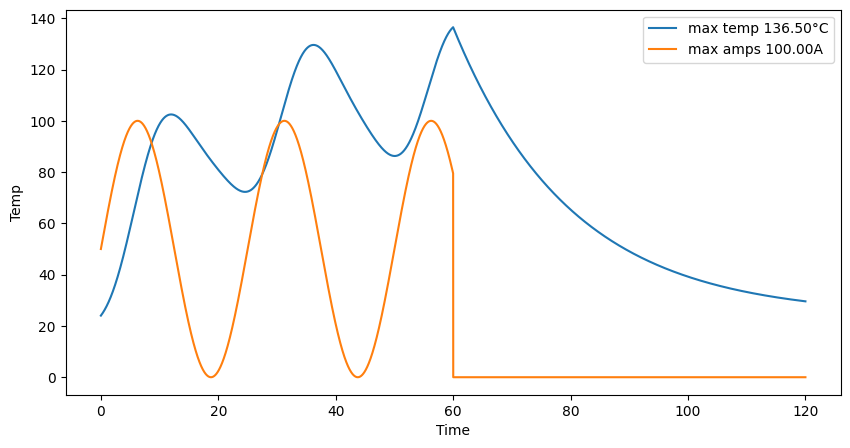

In [9]:

def oscillation1f(amplitude, frequencyHz, t, phaseShift = 0):
  return amplitude * np.sin(2.0 * np.pi * frequencyHz * t + phaseShift)

def setArray(arr, startIndex, endIndex, value):
  l = len(arr)
  for i in range(0, l):
    if i >= startIndex and i < endIndex:
      arr[i] = value

def motorTemp(ampDrawArray, dt):
  tempList = []

  currentTemp = ambientTemp

  for amps in np.nditer(ampDrawArray):
    #P = I^2 * R
    powerDraw = amps * amps * motorR

    # heat 
    currentTemp += (powerDraw - (currentTemp - ambientTemp) / motorRth) / motorCth  * dt
    
    tempList.append(currentTemp)
  
  return np.array(tempList)


frequency = 100#20e3
delta = 1e6 / frequency

dt = delta / 1e6

time = 120

t = np.arange(0, time, dt)

amps = oscillation1f(50.0, 0.04, t, 0) + 50

setArray(amps, time/dt/2, time/dt, 0)

temp = motorTemp(amps, dt)


fig, (ax1) = plt.subplots(nrows=1, sharex=True, figsize=(10, 5))

#constant discharge
#ax1.plot(t, tInv, label = '%.2f mAh' % capacity)
ax1.plot(t, temp, label = 'max temp %.2f°C' % np.max(temp))
ax1.plot(t, amps, label = 'max amps %.2fA' % np.max(amps))
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_ylabel('Temp')


plt.show()